In [1]:
# import pandas 
import pandas as pd
# import numpy
import numpy as np
# import matplotlib
from matplotlib import pyplot as plt
# make plots appear and be stored within the notebook
%matplotlib inline

In [2]:
Sig_Eqs = pd.read_csv("D:/earthquakes.tsv",sep='\t')

In [3]:
deaths_country = Sig_Eqs.groupby(['Country'])['Deaths'].sum().reset_index()
deaths_country

,Country,Deaths
0,AFGHANISTAN,15651.0
1,ALBANIA,3132.0
2,ALGERIA,39339.0
3,ANTARCTICA,0.0
4,ANTIGUA AND BARBUDA,0.0
...,...,...
152,VENEZUELA,44480.0
153,VIETNAM,0.0
154,WALLIS AND FUTUNA (FRENCH TERRITORY),5.0
155,YEMEN,4192.0


In [4]:
top_20_countries = deaths_country.nlargest(20, 'Deaths')
top_20_countries

,Country,Deaths
28,CHINA,2075947.0
141,TURKEY,1188881.0
65,IRAN,1011453.0
69,ITALY,498418.0
132,SYRIA,439224.0
58,HAITI,323478.0
10,AZERBAIJAN,317219.0
71,JAPAN,279607.0
6,ARMENIA,191890.0
103,PAKISTAN,145083.0


In [5]:
#1.2
total_number = Sig_Eqs.loc[Sig_Eqs['Ms'] > 3.0] 
total_number2 = total_number.groupby(['Year'])['Ms'].count().reset_index()
total_number2

,Year,Ms
0,-2000.0,1
1,-479.0,1
2,-426.0,1
3,-400.0,1
4,-373.0,1
...,...,...
492,2012.0,34
493,2013.0,20
494,2015.0,1
495,2017.0,1


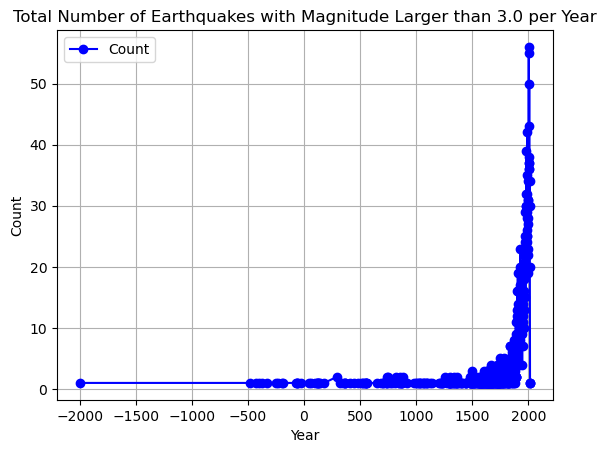

In [6]:
total_number2 = total_number2.rename(columns={'Ms': 'Count'})
total_number2.plot(x='Year', y='Count', marker='o', linestyle='-', color='blue')
plt.title('Total Number of Earthquakes with Magnitude Larger than 3.0 per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()
#The total number of earthquakes with magnitude larger than 3.0 (using column Ms as the magnitude) worldwide each year gradually increased after 1050, and has seen an exponential growth since 1500.
#Reason:Improvements in Seismic Detection: As technology has advanced, our ability to detect earthquakes has improved significantly. This means that earthquakes that may have gone unnoticed in the past are now being recorded.Population Growth and Urbanization: With an increasing global population and the expansion of urban areas, more people are living in seismically active regions, leading to more reported earthquakes.Industrial Activities: Certain human activities, such as mining, fracking, and the construction of large dams, can induce seismic activity. These activities have become more prevalent over time, potentially contributing to the increase in recorded earthquakes.

In [7]:
#1.3 (1)
import pandas as pd

def CountEq_LargestEq(country):
    # 筛选给定国家的地震
    country_eqs = Sig_Eqs[Sig_Eqs['Country'] == country]
    
    # 如果该国家没有地震记录，返回None
    if country_eqs.empty:
        return None
    
    # 该国的地震总数
    total_eqs = len(country_eqs)
    total_eqs
    #(2)
    # 查找该国发生过的最大地震
    if not country_eqs['Ms'].dropna().empty:
        largest_eq_index = country_eqs['Ms'].dropna().idxmax()
        largest_eq = country_eqs.loc[largest_eq_index]
    else:
        return None  # 如果没有有效的震级数据，返回None
    
    # 组装日期信息
    date_info = (largest_eq['Year'] if 'Year' in largest_eq else None,
                 largest_eq['Mo'] if 'Mo' in largest_eq else None,
                 largest_eq['Dy'] if 'Dy' in largest_eq else None)
    
    return total_eqs, date_info[0], date_info[1], date_info[2], largest_eq['Latitude'], largest_eq['Longitude']

# 对文件中的每个国家应用该函数，并按结果降序排列
results = []
for country in Sig_Eqs['Country'].unique():
    result = CountEq_LargestEq(country)
    if result:  # 确保result不是None
        results.append(result)

# 将结果转换为DataFrame
if results:  # 确保results不为空
    results_df = pd.DataFrame(results, columns=['Total_Earthquakes', 'Year', 'Mo', 'Dy', 'Latitude', 'Longitude'])

    # 按地震总数降序排列结果
    sorted_results = results_df.sort_values('Total_Earthquakes', ascending=False)

    # 显示结果
    print(sorted_results)
else:
    print("No data available.")

     Total_Earthquakes    Year    Mo    Dy  Latitude  Longitude
13                 623  1920.0  12.0  16.0    36.601    105.317
32                 419   869.0   7.0  13.0    38.500    143.800
65                 412  2004.0  12.0  26.0     3.295     95.982
6                  386   856.0  12.0  22.0    36.200     54.300
8                  337  1939.0  12.0  26.0    39.907     39.586
..                 ...     ...   ...   ...       ...        ...
121                  1  1993.0   3.0  12.0   -14.385   -178.252
122                  1  1993.0   8.0   1.0    15.385     31.690
88                   1  1848.0   7.0  12.0   -17.900   -149.900
83                   1  1819.0   8.0  31.0    66.416     12.850
104                  1  1914.0  10.0  23.0     6.000    132.500

[129 rows x 6 columns]


C:\Users\kl\AppData\Local\Temp\ipykernel_19616\3216906544.py:6: DtypeWarning: Columns (4,8,9,10,11,14,15,24,25,27,29,31,34,37,38,40,41,45,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('D:/GitKraken/ese5023/assignment/Baoan_Weather_1998_2022.csv')


       STATION                 DATE  SOURCE REPORT_TYPE CALL_SIGN  \
0  59493099999  1998-01-01T00:00:00       4       SY-MT     ZGSZ    
1  59493099999  1998-01-01T01:00:00       4       FM-15     ZGSZ    
2  59493099999  1998-01-01T02:00:00       4       FM-15     ZGSZ    
3  59493099999  1998-01-01T03:00:00       4       SY-MT     ZGSZ    
4  59493099999  1998-01-01T04:00:00       4       FM-15     ZGSZ    

  QUALITY_CONTROL          AA1  AA2  AA3    AG1  ... REPORT_TYPE.1  SA1  \
0            V020  06,0000,9,1  NaN  NaN  0,000  ...         SY-MT  NaN   
1            V020          NaN  NaN  NaN  0,999  ...         FM-15  NaN   
2            V020          NaN  NaN  NaN  0,999  ...         FM-15  NaN   
3            V020          NaN  NaN  NaN  0,000  ...         SY-MT  NaN   
4            V020          NaN  NaN  NaN  0,999  ...         FM-15  NaN   

       SLP SOURCE.1      TMP  UA1  UG1           VIS WG1             WND  
0  10184,1        4  +0186,1  NaN  NaN  008000,1,N,1 NaN  0

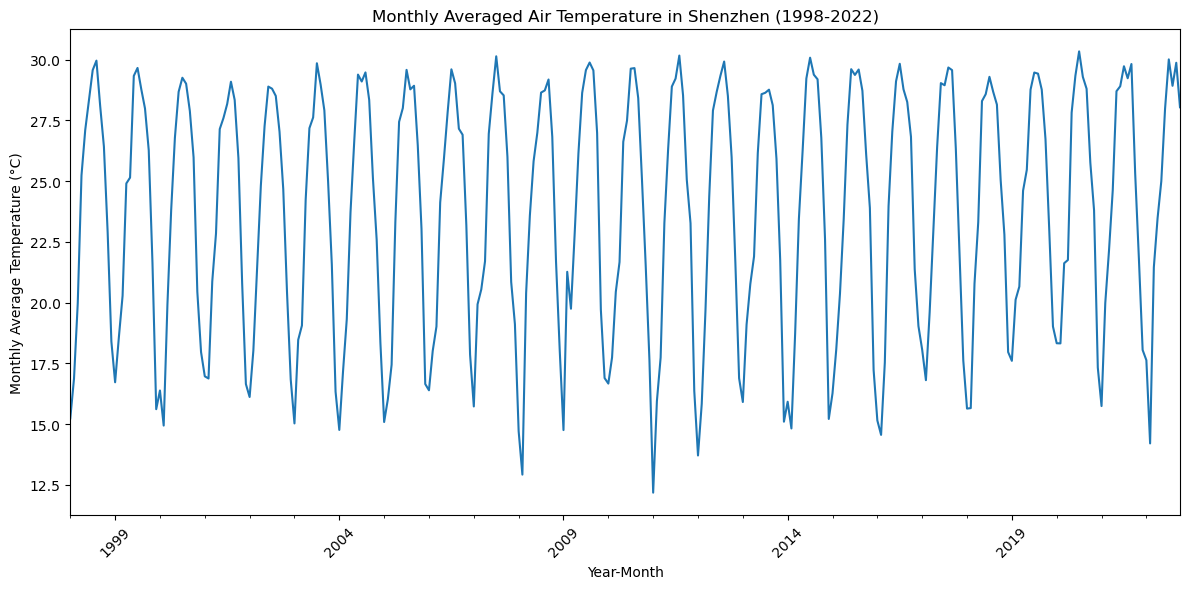

In [8]:
#2
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
data = pd.read_csv('D:/GitKraken/ese5023/assignment/Baoan_Weather_1998_2022.csv')
print(data.head())

# 拆分 TMP 列为 'Temperature' 和 'QC'
data[['Temperature', 'QC']] = data['TMP'].str.split(',', expand=True)

# 将 'Temperature' 转换为实际温度值，并将 'QC' 转换为整数类型
data['Temperature'] = pd.to_numeric(data['Temperature'], errors='coerce') / 10
data['QC'] = pd.to_numeric(data['QC'], errors='coerce')

# 过滤掉不符合质量标准的数据
data = data[(data['QC'] == 0) | (data['QC'] == 1 ) | (data['QC'] == 4 ) | (data['QC'] == 5)]

# 转换日期列为 datetime 格式
data['DATE'] = pd.to_datetime(data['DATE'], errors='coerce')

# 按照年月计算月平均温度
data['YearMonth'] = data['DATE'].dt.to_period('M')
monthly_avg_temp = data.groupby('YearMonth')['Temperature'].mean()

# 绘制结果
plt.figure(figsize=(12, 6))
monthly_avg_temp.plot()
plt.xlabel('Year-Month')
plt.ylabel('Monthly Average Temperature (°C)')
plt.title('Monthly Averaged Air Temperature in Shenzhen (1998-2022)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
#数据过滤：在数据过滤步骤中，代码只保留那些QC值为0, 1, 4, 或5的数据行。这些QC值通常表示数据是可靠的或在可接受的质量标准内。
#过去25年的月平均气温趋势：月平均气温一年内通常先变大后变小，年际变化趋于平稳。

In [9]:
#3
#pd.read_csv: This is the function used to read a CSV file into a pandas DataFrame.
#usecols=range(17): This option specifies that only the first 17 columns of the CSV file should be read into the DataFrame. This is useful when you are only interested in a subset of the data or when the file contains unnecessary columns that you want to ignore.
#skiprows=[1, 2]: This option tells pandas to skip the first two rows of the file when reading it. This is often used when the file has header rows that are not needed in the DataFrame or when there are introductory rows that contain metadata or other non-data information.
#parse_dates=['ISO_TIME']: This option is used to parse a column as a datetime object. In this case, the 'ISO_TIME' column is being converted into a datetime format, which is useful for time series analysis and allows for easier manipulation of time data.
#na_values=['NOT_NAMED', 'NAME']: This option is used to specify custom missing or null values. Here, 'NOT_NAMED' and 'NAME' are being treated as missing values, which is useful for cleaning the data and ensuring that these specific strings are not误interpreted as actual data.
#After executing this code, df.head() is called to display the first five rows of the DataFrame, which is a quick way to inspect the initial data.

In [10]:
#3.1
import pandas as pd

# 加载数据集
df = pd.read_csv('D:/GitKraken/ese5023/assignment/ibtracs.ALL.list.v04r00.csv',
                 usecols=range(17),
                 skiprows=[1, 2],
                 parse_dates=['ISO_TIME'],
                 na_values=['NOT_NAMED', 'NAME'])

# 清理WMO_WIND列，移除空格，并转换为数值类型
df['WMO_WIND'] = df['WMO_WIND'].str.replace(' ', '')  # 移除空格
df['WMO_WIND'] = pd.to_numeric(df['WMO_WIND'], errors='coerce')  # 转换为数值类型

# 按照风速降序排序，并选择前10个飓风的名字
top_10_hurricanes = df.nlargest(10, 'WMO_WIND')[['NAME', 'WMO_WIND']]
print(top_10_hurricanes)

C:\Users\kl\AppData\Local\Temp\ipykernel_19616\4196286950.py:5: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('D:/GitKraken/ese5023/assignment/ibtracs.ALL.list.v04r00.csv',


            NAME  WMO_WIND
665954  PATRICIA     185.0
665952  PATRICIA     180.0
665956  PATRICIA     180.0
427636     ALLEN     165.0
178209       NaN     160.0
178210       NaN     160.0
178212       NaN     160.0
482074   GILBERT     160.0
552459     LINDA     160.0
605746     WILMA     160.0


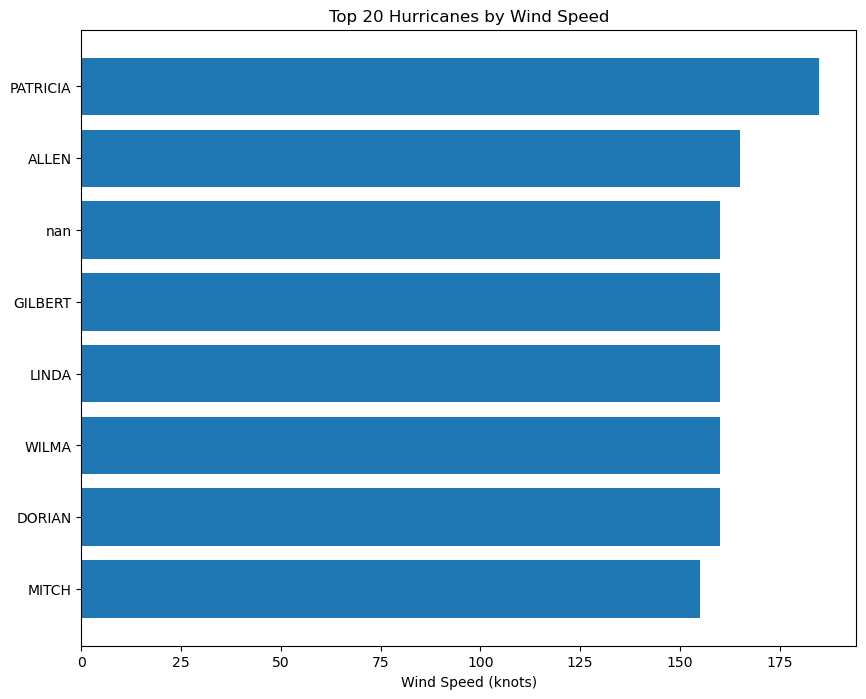

In [11]:
#3.2
import matplotlib.pyplot as plt
import pandas as pd

# 确保WMO_WIND列中没有空值
df = df.dropna(subset=['WMO_WIND'])

# 确保NAME列是字符串类型
df['NAME'] = df['NAME'].astype(str)

# 按照风速降序排序，并选择前20个飓风的风速
top_20_hurricanes = df.nlargest(20, 'WMO_WIND')[['NAME', 'WMO_WIND']]
top_20_hurricanes
# 制作条形图
plt.figure(figsize=(10, 8))
plt.barh(top_20_hurricanes['NAME'].astype(str), top_20_hurricanes['WMO_WIND'])
plt.xlabel('Wind Speed (knots)')
plt.title('Top 20 Hurricanes by Wind Speed')
plt.gca().invert_yaxis()  # 将条形图的顺序反转，使得最大的飓风在顶部
plt.show()

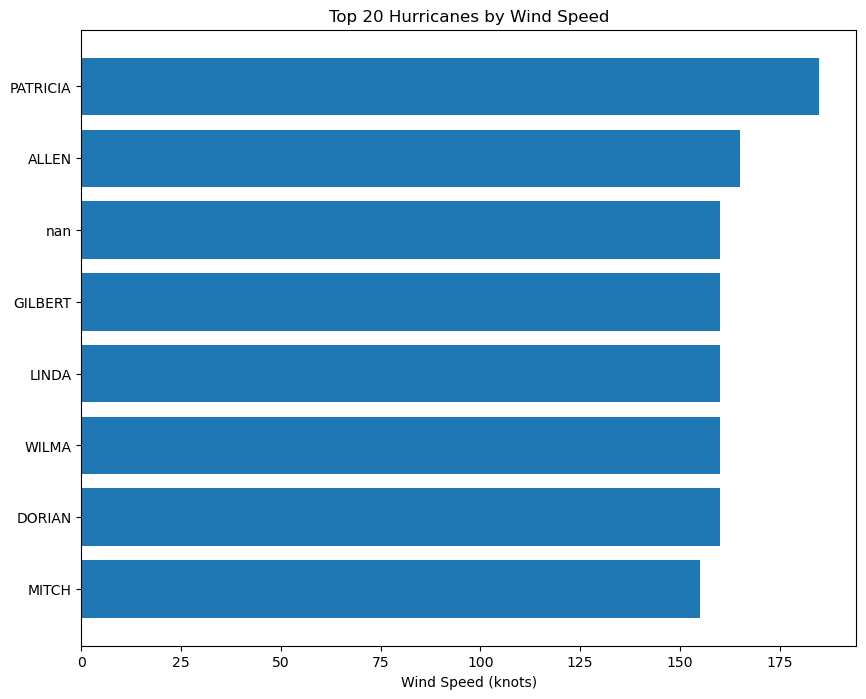

In [12]:
# 制作条形图
plt.figure(figsize=(10, 8))
plt.barh(top_20_hurricanes['NAME'].astype(str), top_20_hurricanes['WMO_WIND'])
plt.xlabel('Wind Speed (knots)')
plt.title('Top 20 Hurricanes by Wind Speed')
plt.gca().invert_yaxis()  # 将条形图的顺序反转，使得最大的飓风在顶部
plt.show()

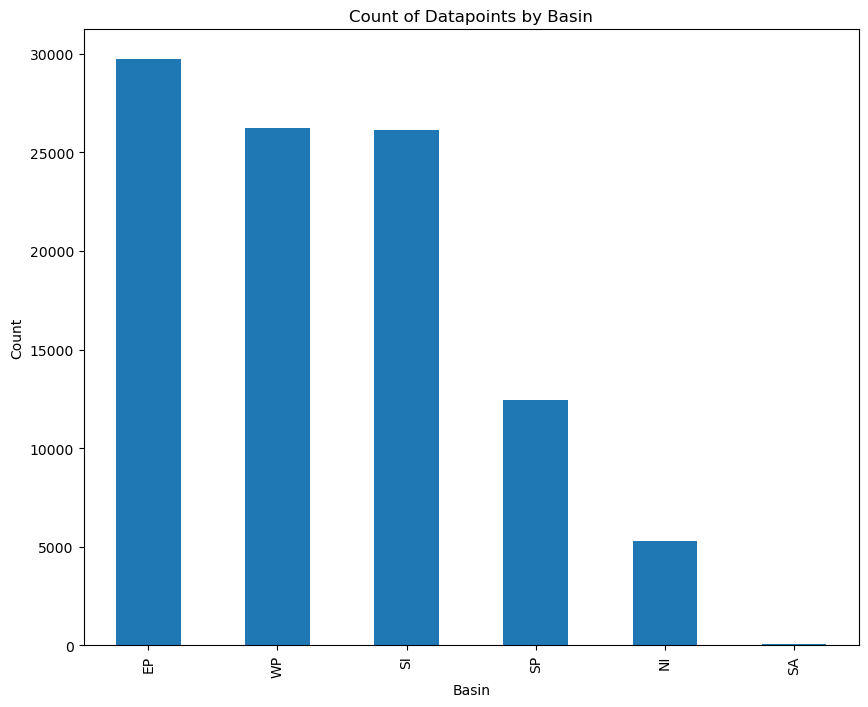

In [13]:
#3.3
# 按流域分组并计算每个流域的数据点数量
basin_counts = df['BASIN'].value_counts()

# 制作条形图
plt.figure(figsize=(10, 8))
basin_counts.plot(kind='bar')
plt.xlabel('Basin')
plt.ylabel('Count')
plt.title('Count of Datapoints by Basin')
plt.show()

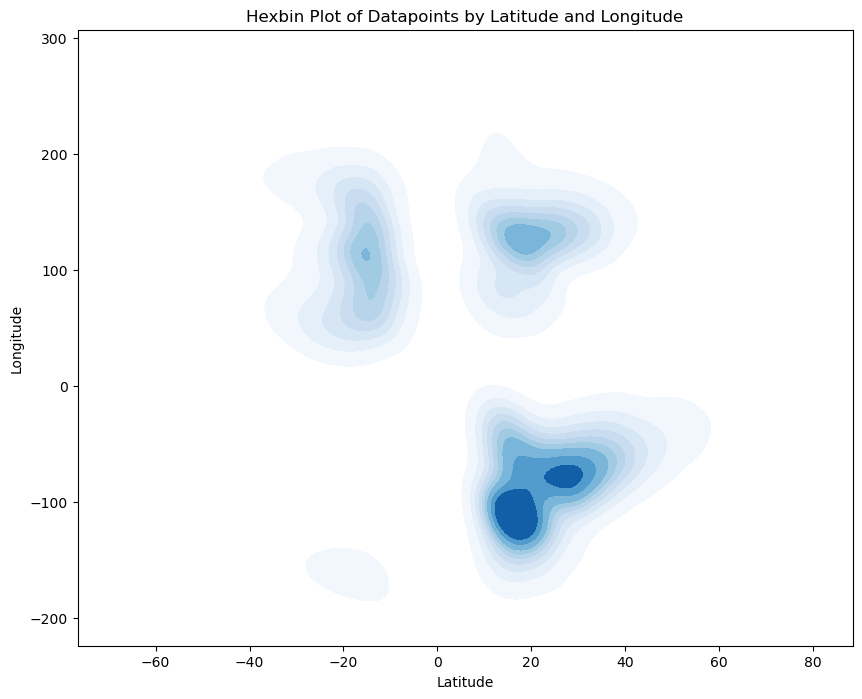

In [14]:
#3.4
import seaborn as sns

# 制作六边形图
plt.figure(figsize=(10, 8))
sns.kdeplot(data=df, x='LAT', y='LON', cmap="Blues", fill=True)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Hexbin Plot of Datapoints by Latitude and Longitude')
plt.show()

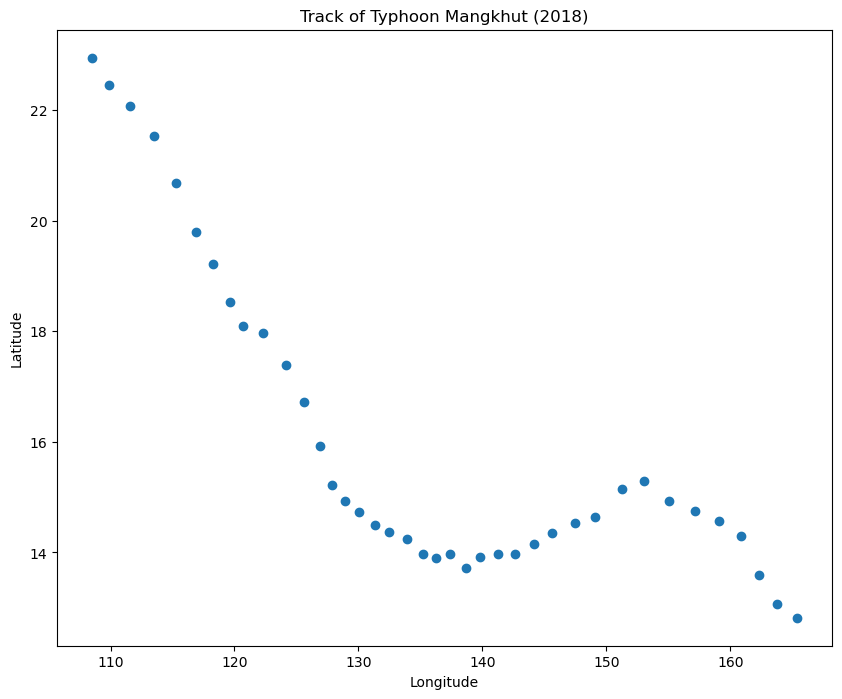

In [15]:
#3.5
import matplotlib.pyplot as plt
import pandas as pd

# 从ISO_TIME列中提取年份，并创建一个新的YEAR列
df['YEAR'] = pd.to_datetime(df['ISO_TIME']).dt.year

# 筛选出台风Mangkhut的数据
mangkhut = df[(df['NAME'] == 'MANGKHUT') & (df['YEAR'] == 2018)]

# 绘制散点图
plt.figure(figsize=(10, 8))
plt.scatter(mangkhut['LON'], mangkhut['LAT'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Track of Typhoon Mangkhut (2018)')
plt.show()

In [18]:
#3.6
# 筛选1970年以后的数据
# western_pacific = df[(df['BASIN'] == 'WP') & (df['YEAR'] >= 1970)]
# eastern_pacific = df[(df['BASIN'] == 'EP') & (df['YEAR'] >= 1970)]

# 合并两个流域的数据
pacific_data = df[(df['YEAR'] >= 1970) & df['BASIN'].isin(["WP", "EP"])]
# 将ISO_TIME列转换为日期，并设置为索引
pacific_data['ISO_TIME'] = pd.to_datetime(pacific_data['ISO_TIME'])
pacific_data.set_index('ISO_TIME', inplace=True)
pacific_data

C:\Users\kl\AppData\Local\Temp\ipykernel_19616\3895400550.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pacific_data['ISO_TIME'] = pd.to_datetime(pacific_data['ISO_TIME'])


,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,NATURE,LAT,LON,WMO_WIND,WMO_PRES,WMO_AGENCY,TRACK_TYPE,DIST2LAND,LANDFALL,IFLAG,YEAR
ISO_TIME,,,,,,,,,,,,,,,,,
1970-05-30 12:00:00,1970151N11261,1970,46,EP,MM,ADELE,TS,11.1000,-98.600,45.0,,hurdat_epa,main,548,548,O________OO___,1970
1970-05-30 18:00:00,1970151N11261,1970,46,EP,MM,ADELE,TS,11.0906,-99.301,45.0,,hurdat_epa,main,572,572,O________OP___,1970
1970-05-31 00:00:00,1970151N11261,1970,46,EP,MM,ADELE,TS,11.0000,-99.900,45.0,,hurdat_epa,main,604,604,O________OO___,1970
1970-05-31 06:00:00,1970151N11261,1970,46,EP,MM,ADELE,TS,10.9084,-100.390,45.0,,hurdat_epa,main,635,635,O________OP___,1970
1970-05-31 12:00:00,1970151N11261,1970,46,EP,MM,ADELE,TS,10.9000,-100.900,45.0,,hurdat_epa,main,653,653,O________OO___,1970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-09 00:00:00,2021311N13248,2021,40,EP,MM,SANDRA,TS,15.1000,-118.200,30.0,1008,hurdat_epa,main,1225,1225,O_____________,2021
2021-11-09 06:00:00,2021311N13248,2021,40,EP,MM,SANDRA,TS,15.0000,-119.100,25.0,1009,hurdat_epa,main,1301,1301,O_____________,2021
2021-11-09 12:00:00,2021311N13248,2021,40,EP,MM,SANDRA,TS,14.7000,-120.100,25.0,1010,hurdat_epa,main,1396,1396,O_____________,2021


ISO_TIME
1970-05-30    2
1970-05-31    4
1970-06-01    4
1970-06-02    4
1970-06-03    4
             ..
2021-11-06    4
2021-11-07    7
2021-11-08    8
2021-11-09    8
2021-11-10    4
Freq: D, Length: 18793, dtype: int64


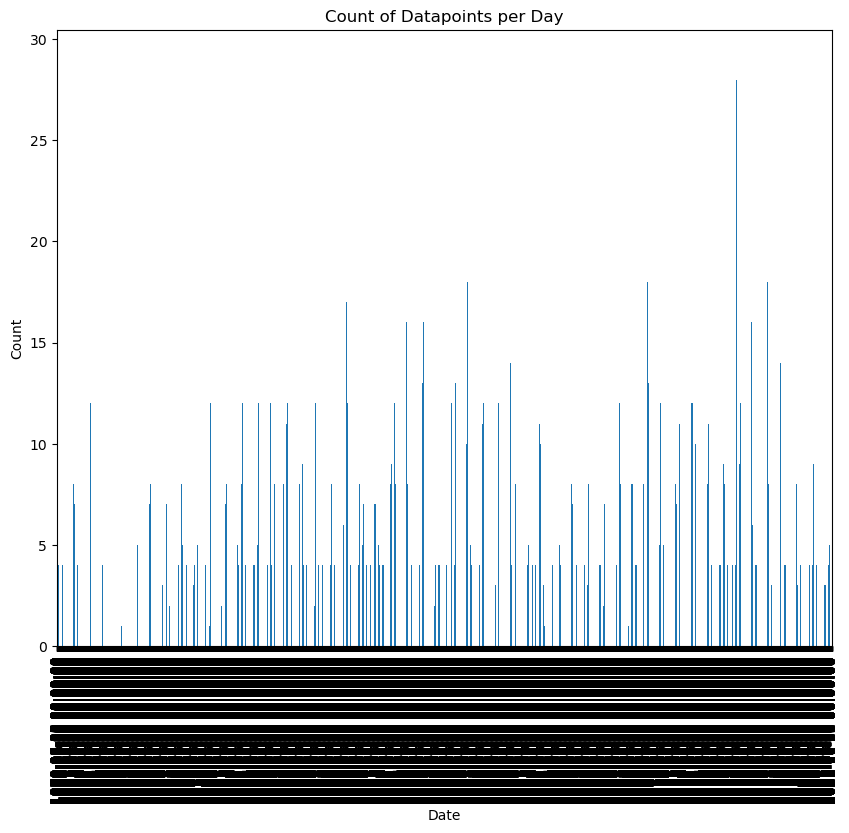

In [19]:
#3.7
# 按天计数数据点
daily_counts = pacific_data.resample('D').size()
print(daily_counts)

# 绘制条形图
plt.figure(figsize=(10, 8))
daily_counts.plot(kind='bar')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Count of Datapoints per Day')
plt.show()

C:\Users\kl\AppData\Local\Temp\ipykernel_19616\3855393374.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  for k, v in daily_counts.resample('Y'):


<BarContainer object of 18793 artists>

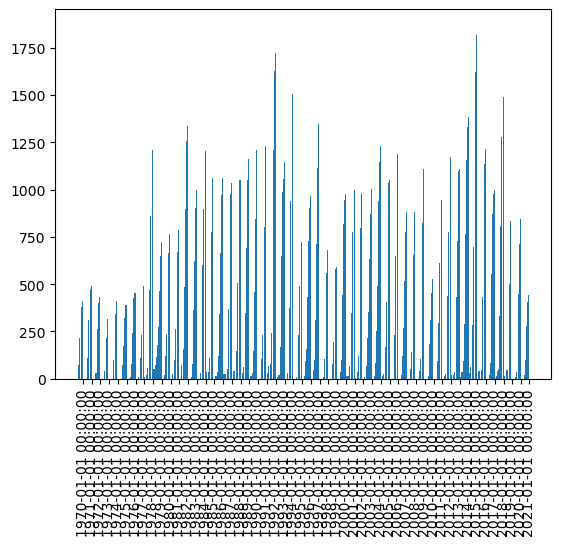

In [125]:
# 3.8
xs, ys, lens = [], [], []
for k, v in daily_counts.resample('Y'):
    first = pd.Timestamp(f"{k.year}-01-01 00:00:00")
    v.index = (v.index - t).days
    # 获取每一年统计量的长度
    xs.append(first)
    ys.append(np.cumsum(v))
    lens.append(len(v))

cum_lens = np.cumsum(lens)
cat_data = np.concatenate(ys)
# 绘制
_ = plt.xticks(cum_lens, xs, rotation=90)
plt.bar(np.arange(len(cat_data)), cat_data)

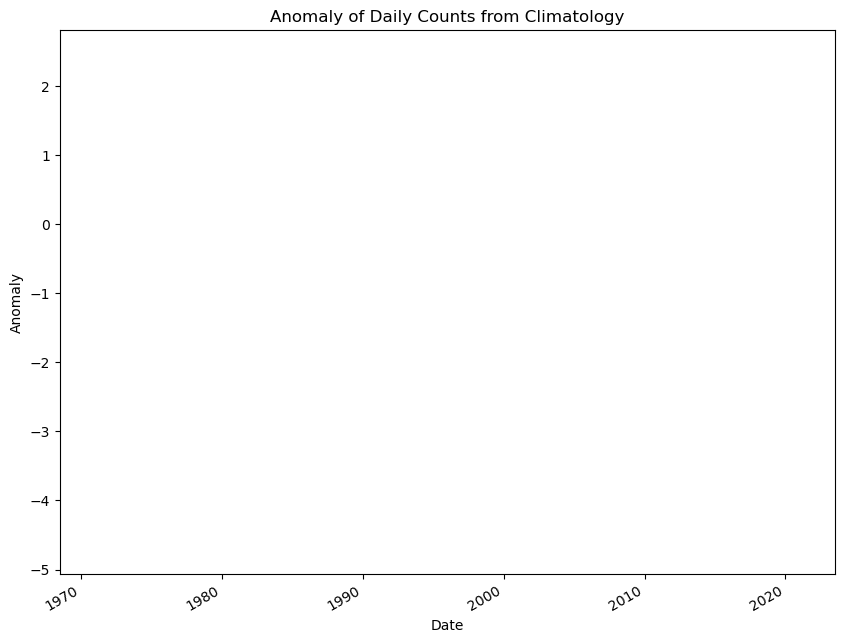

In [133]:
#3.9
# 计算异常值
anomalies = daily_counts - climatology

# 绘制异常值时间序列
plt.figure(figsize=(10, 8))
anomalies.plot()
plt.xlabel('Date')
plt.ylabel('Anomaly')
plt.title('Anomaly of Daily Counts from Climatology')
plt.show()

C:\Users\kl\AppData\Local\Temp\ipykernel_19616\2126095809.py:3: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_anomalies = anomalies.resample('A').mean()


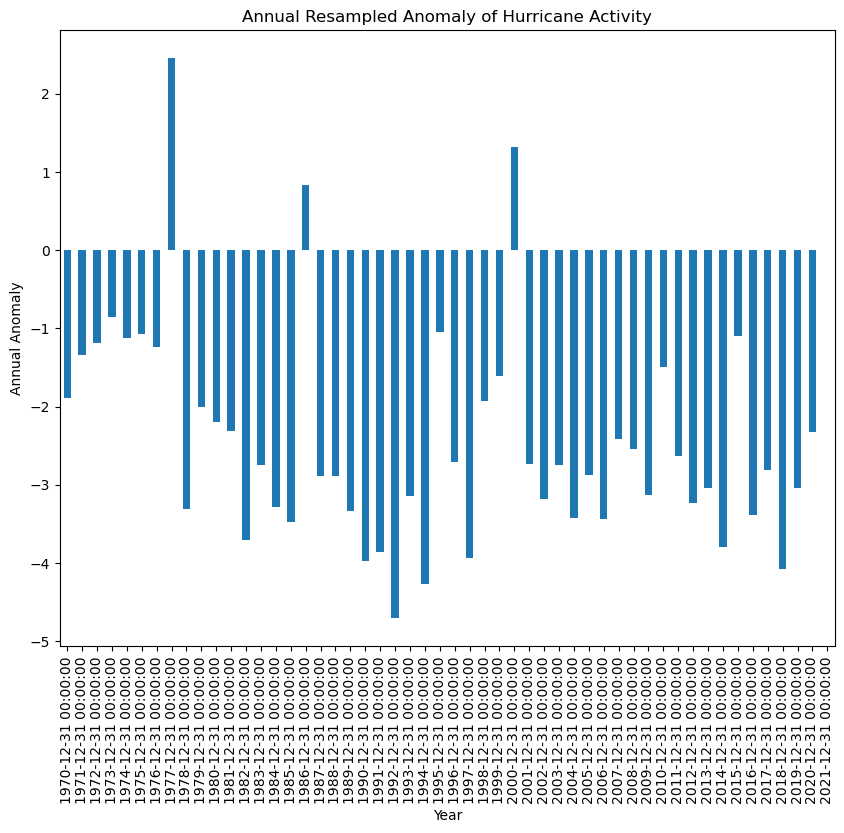

In [131]:
#3.10
# 重新采样至年分辨率
annual_anomalies = anomalies.resample('A').mean()

# 绘制条形图
plt.figure(figsize=(10, 8))
annual_anomalies.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Annual Anomaly')
plt.title('Annual Resampled Anomaly of Hurricane Activity')
plt.show()

In [249]:
#4.1
USC = pd.read_csv('D:/GitKraken/ese5023/assignment/USC00218450.csv').fillna(0)
USC

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,CDSD,CDSD_ATTRIBUTES,CLDD,CLDD_ATTRIBUTES,...,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
0,USC00218450,1960-10,44.9902,-93.17995,295.7,"UNIVERSITY OF MN ST. PAUL, MN US",0.0,0,0.0,0,...,10.7,",,,Z",0.0,0,0.00,0,0.00,0,0.00,0
1,USC00218450,1960-11,44.9902,-93.17995,295.7,"UNIVERSITY OF MN ST. PAUL, MN US",0.0,0,0.0,0,...,28.0,",,,Z",0.0,0,0.00,0,0.00,0,0.00,0
2,USC00218450,1960-12,44.9902,-93.17995,295.7,"UNIVERSITY OF MN ST. PAUL, MN US",0.0,0,0.0,0,...,18.6,",,,Z",0.0,0,0.00,0,0.00,0,0.00,0
3,USC00218450,1961-01,44.9902,-93.17995,295.7,"UNIVERSITY OF MN ST. PAUL, MN US",0.0,0,0.0,0,...,2.6,",,,Z",0.0,0,0.00,0,0.00,0,0.00,0
4,USC00218450,1961-02,44.9902,-93.17995,295.7,"UNIVERSITY OF MN ST. PAUL, MN US",0.0,0,0.0,0,...,5.9,",,,Z",0.0,0,0.00,0,0.00,0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,USC00218450,2024-04,44.9902,-93.17995,295.7,"UNIVERSITY OF MN ST. PAUL, MN US",0.0,0,0.0,",7",...,97.9,",,,7",10.0,",,,7",8.12,",7",12.85,",,,7",3.40,",,,7"
763,USC00218450,2024-05,44.9902,-93.17995,295.7,"UNIVERSITY OF MN ST. PAUL, MN US",10.0,0,10.0,",7",...,140.6,",,,7",0.0,",,,7",15.62,",7",21.39,",,,7",9.85,",,,7"
764,USC00218450,2024-06,44.9902,-93.17995,295.7,"UNIVERSITY OF MN ST. PAUL, MN US",58.0,0,48.0,",7",...,202.9,",,,7",0.0,",T,,7",19.47,",7",24.37,",,,7",14.58,",,,7"
765,USC00218450,2024-07,44.9902,-93.17995,295.7,"UNIVERSITY OF MN ST. PAUL, MN US",168.5,0,110.5,",7",...,122.2,",,,7",0.0,",,,7",21.82,",7",26.64,",,,7",17.00,",,,7"


Text(0.5, 1.0, 'Time Series of PRCP')

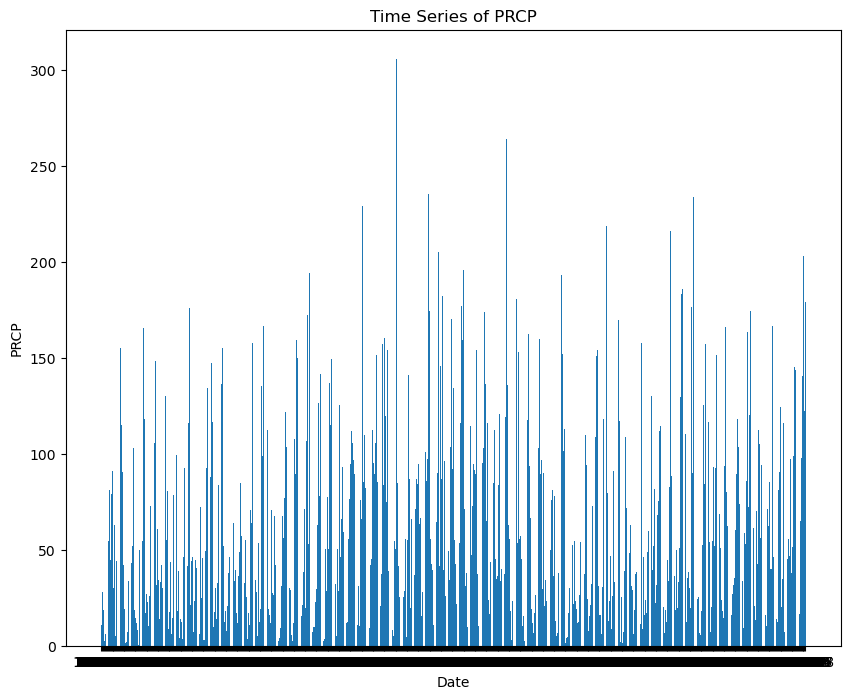

In [259]:
#4.2 绘制时间序列
plt.figure(figsize=(10, 8))
plt.bar(USC['DATE'], USC['PRCP'])
plt.xlabel('Date')
plt.ylabel('PRCP')
plt.title('Time Series of PRCP')

In [261]:
#4.3
# 检查是否有缺失值  
missing_values = df.isnull().sum()  
print("缺失值情况：")  
print(missing_values)  

# 清理缺失值（如果对缺失值的处理方式有具体要求，可以在这里调整）  
df_cleaned = df.dropna() 
# 计算描述性统计量
desc_stats = USC['PRCP'].describe()

# 计算相关性
correlation = USC['PRCP'].corr(df['EMXP'])

# 计算标准差
std_dev = USC['PRCP'].std()

# 计算均值
mean_temp = USC['PRCP'].mean()

# 计算中位数
median_temp = USC['PRCP'].median()

# 报告发现
print("Descriptive Statistics:\n", desc_stats)
print("Correlation with Another Variable:", correlation)
print("Standard Deviation:", std_dev)
print("Mean Temperature:", mean_temp)
print("Median Temperature:", median_temp)


缺失值情况：
STATION            0
DATE               0
LATITUDE           0
LONGITUDE          0
ELEVATION          0
                  ..
TAVG_ATTRIBUTES    0
TMAX               0
TMAX_ATTRIBUTES    0
TMIN               0
TMIN_ATTRIBUTES    0
Length: 178, dtype: int64
Descriptive Statistics:
 count    767.000000
mean      64.783833
std       52.833345
min        0.000000
25%       22.850000
50%       51.600000
75%       93.900000
max      305.800000
Name: PRCP, dtype: float64
Correlation with Another Variable: nan
Standard Deviation: 52.83334480370376
Mean Temperature: 64.78383311603652
Median Temperature: 51.6
